In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller


In [9]:
df = pd.read_csv("monthly-milk-production-pounds-p.csv", index_col = 0)
y = df["Milk"]

#### finding Stationarity of series

In [11]:
out = adfuller(y, maxlag = 10)
print("P-Value = ", out[1])
if out[1] < 0.05:
    print("Timer Series is Stationary")
else:
    print("Time Series is not Stationary")

P-Value =  0.644383260693011
Time Series is not Stationary


#### First order differencing

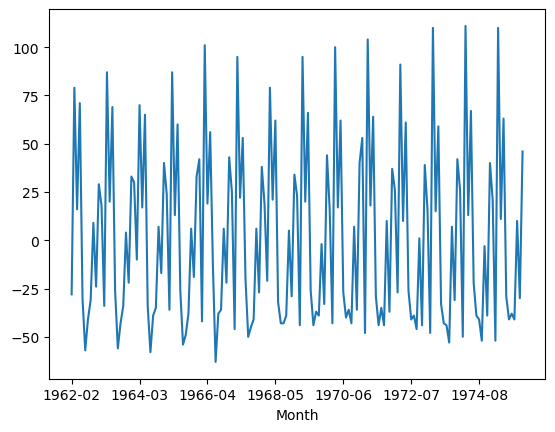

In [17]:
y.diff()[1:].plot()
plt.show()

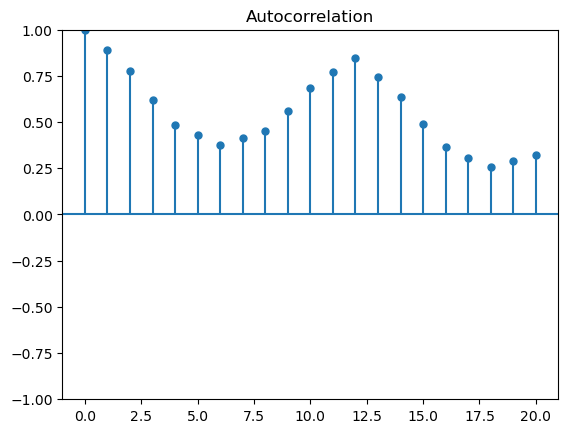

In [28]:
from statsmodels.graphics.tsaplots import plot_acf # import for needle plot
plot_acf(y, lags = 20, alpha = None)
plt.show()

# Coal consumption dataset

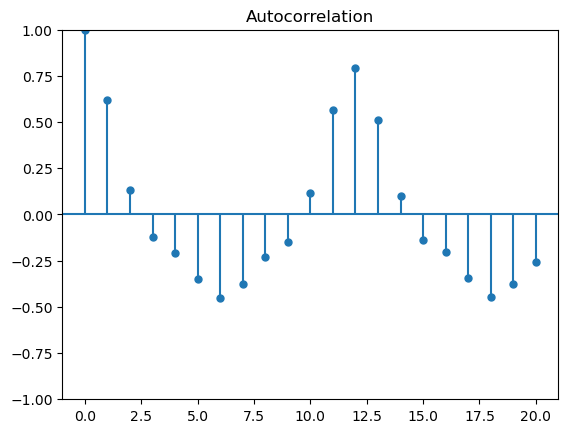

In [26]:
df = pd.read_csv("Coal consumption.csv", index_col = 0)
plot_acf(df["Amount"], lags = 20, alpha = None)
plt.show()
# The needle plot.........

## AR Model 

In [42]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import root_mean_squared_error

In [38]:
df = pd.read_csv("monthly-milk-production-pounds-p.csv", index_col = 0)
df.index = pd.to_datetime(df.index).to_period('M').to_timestamp() 
y = df["Milk"]
y_train = y[:-12]
y_test = y[-12:]

In [40]:
y_train.shape

(156,)

In [46]:
model = ARIMA(
    y_train, 
    order = (1, 0, 0)        # (p, d, q) = (order of AR model, order of differencing, order of moving avg. model)
)

model_fit = model.fit()

In [50]:
y_pred =model_fit.predict(start = len(y_train),
                          end = len(y_train) + len(y_test) - 1)
root_mean_squared_error(y_test, y_pred)

98.75538388119782

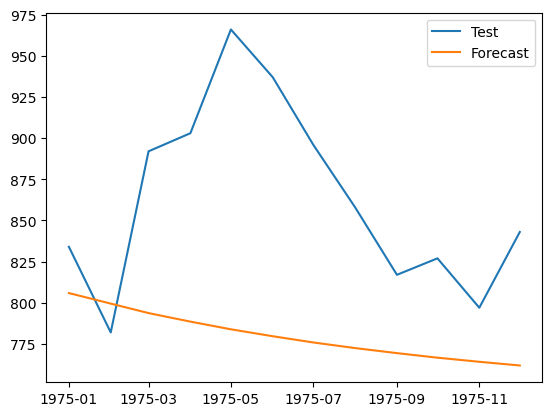

In [52]:
plt.plot(y_test, label = "Test")
plt.plot(y_pred, label = "Forecast")
plt.legend()
plt.show()

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6.3806412503628165 (12, 12)


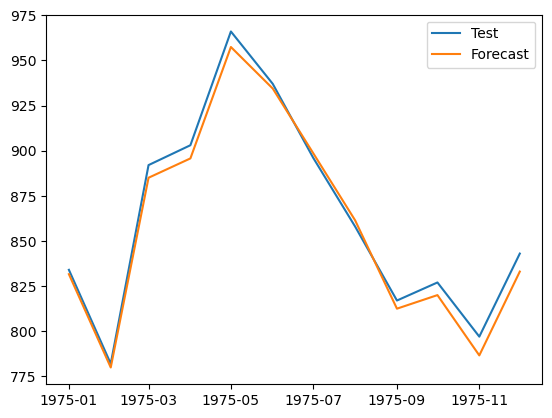

In [92]:
# 2nd model with diff = 1

model = ARIMA(
    y_train, 
    order = (24, 2, 0)        # (p, d, q) = (order of AR model, order of differencing, order of moving avg. model)
)

model_fit = model.fit()

y_pred = model_fit.predict(start = len(y_train),
                          end = len(y_train) + len(y_test) - 1)

print(root_mean_squared_error(y_test, y_pred), (len(y_test), len(y_pred)))

plt.plot(y_test, label = "Test")
plt.plot(y_pred, label = "Forecast")
plt.legend()
plt.show()

10.448496990218121 (12, 12)


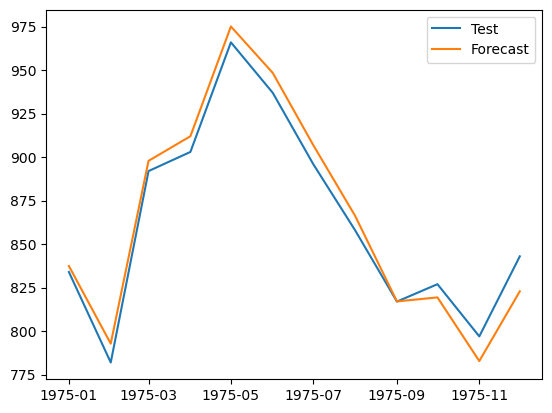

In [104]:
# Seasonal ARIMA (SARIMA)

model = ARIMA(
    y_train, 
    order = (3, 1, 0),           # (p, d, q) = (order of AR model, order of differencing, order of moving avg. model)
    freq = "MS" ,
    seasonal_order= (1, 1, 1, 12)
)

model_fit = model.fit()

y_pred = model_fit.predict(start = len(y_train),
                          end = len(y_train) + len(y_test) - 1)

print(root_mean_squared_error(y_test, y_pred), (len(y_test), len(y_pred)))

plt.plot(y_test, label = "Test")
plt.plot(y_pred, label = "Forecast")
plt.legend()
plt.show()

In [116]:
# Tuning SARIMA
from pmdarima.arima import auto_arima

In [124]:
model = auto_arima(y_train, 
                  trace = True,
                  error_action = "ignore", 
                  suppress_warnings = True,
                
                 )



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1593.690, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1624.299, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1626.095, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1626.164, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1622.458, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1604.395, Time=0.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1618.644, Time=0.28 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1572.233, Time=0.80 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.15 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1561.976, Time=1.12 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=1.18 s

In [126]:
y_pred = model.predict(n_periods = len(y_test))
root_mean_squared_error(y_test, y_pred)

57.06880071073694

In [120]:
model = auto_arima(y_train, 
                  trace = True,
                  error_action = "ignore", 
                  suppress_warnings = True,
                seasonal = True,
                   m = 12
                 )


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1000.136, Time=1.97 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1218.095, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1015.855, Time=0.47 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1104.312, Time=0.47 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1349.320, Time=0.02 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=998.169, Time=1.47 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=1038.230, Time=0.43 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=1000.125, Time=3.86 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=1012.395, Time=1.27 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=5.32 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=996.457, Time=0.89 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=1036.989, Time=0.25 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=998.423, Time=1.17 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=998.411, Time=2.51 sec
 ARIMA(1,0,2)(1,1,0)[12] int

In [122]:
y_pred = model.predict(n_periods = len(y_test))
root_mean_squared_error(y_test, y_pred)

13.941093095028885

# BUNDISBANK Dataset

In [136]:
df = pd.read_csv("BUNDESBANK-BBK01_WT5511.csv", index_col = 0)
df.index = pd.to_datetime(df.index, dayfirst= True).to_period('M').to_timestamp() 
df

Value
Date               
1968-04-01    39.10
1968-05-01    42.00
1968-06-01    40.95
1968-07-01    38.90
1968-08-01    39.85
...             ...
2015-12-01  1062.25
2016-01-01  1112.90
2016-02-01  1234.15
2016-03-01  1233.60
2016-04-01  1237.70

[577 rows x 1 columns]

In [140]:
y = df["Value"]
y_train, y_test = y[:-12], y[-12:]

In [143]:
model = auto_arima(y_train, 
                  trace = True,
                  error_action = "ignore", 
                  suppress_warnings = True,
                seasonal = True,
                   m = 12
                 )

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=5615.321, Time=2.97 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5622.164, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5619.560, Time=0.50 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5618.957, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5622.101, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=5613.429, Time=2.77 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=5611.712, Time=5.84 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=5617.326, Time=6.50 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=3.23 sec
 ARIMA(2,1,1)(0,0,2)[12] intercept   : AIC=5622.630, Time=3.32 sec
 ARIMA(3,1,2)(0,0,2)[12] intercept   : AIC=5626.629, Time=4.02 sec
 ARIMA(2,1,3)(0,0,2)[12] intercept   : AIC=5626.630, Time=5.07 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=5621.194, Time=2.31 sec
 ARIMA(1,1,3)(0,0,2)[12] inte

In [145]:
y_pred = model.predict(n_periods = len(y_test))
root_mean_squared_error(y_test, y_pred)

92.67159545834376

In [147]:
root_mean_squared_error(y_test, y_pred)

92.67159545834376

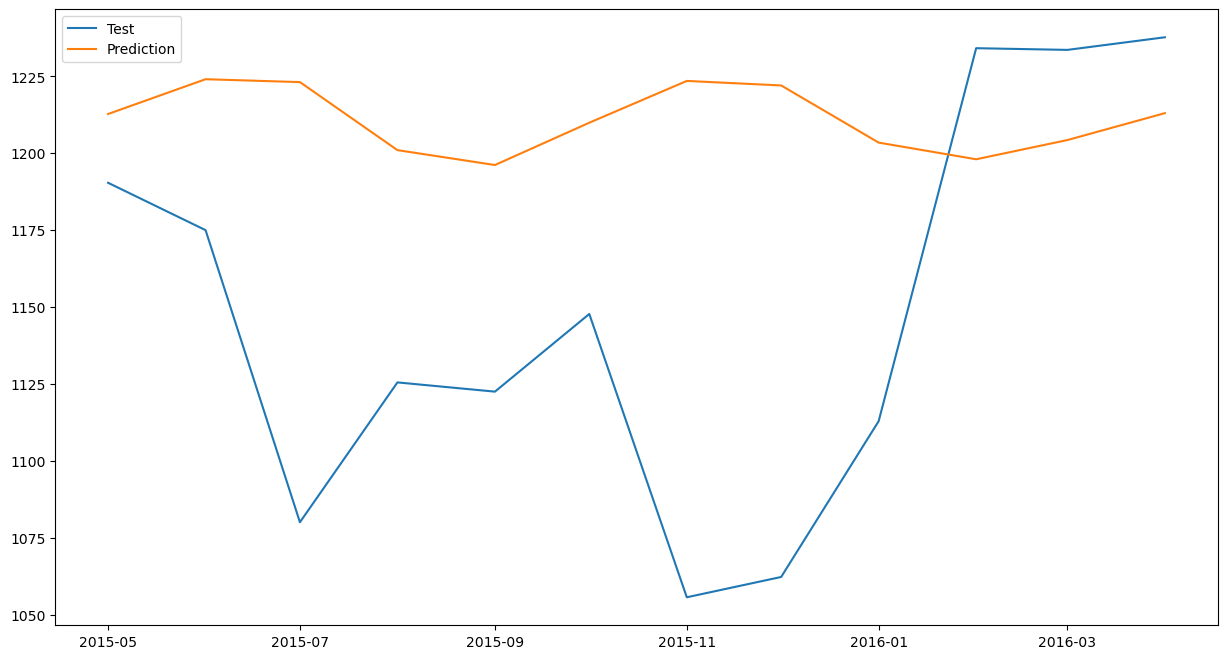

In [149]:
plt.figure(figsize = (15, 8))
plt.plot(y_test, label = "Test")
plt.plot(y_pred, label = "Prediction")
plt.legend()
plt.show()

In [151]:
model = auto_arima(y_train, 
                  trace = True,
                  error_action = "ignore", 
                  suppress_warnings = True,
                # seasonal = True,
                #    m = 12
                 )

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5622.164, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5618.047, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5617.332, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5622.101, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5618.606, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5618.188, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5617.812, Time=0.09 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 2.658 seconds


In [153]:
y_pred = model.predict(n_periods = len(y_test))
root_mean_squared_error(y_test, y_pred)

91.10508105558864

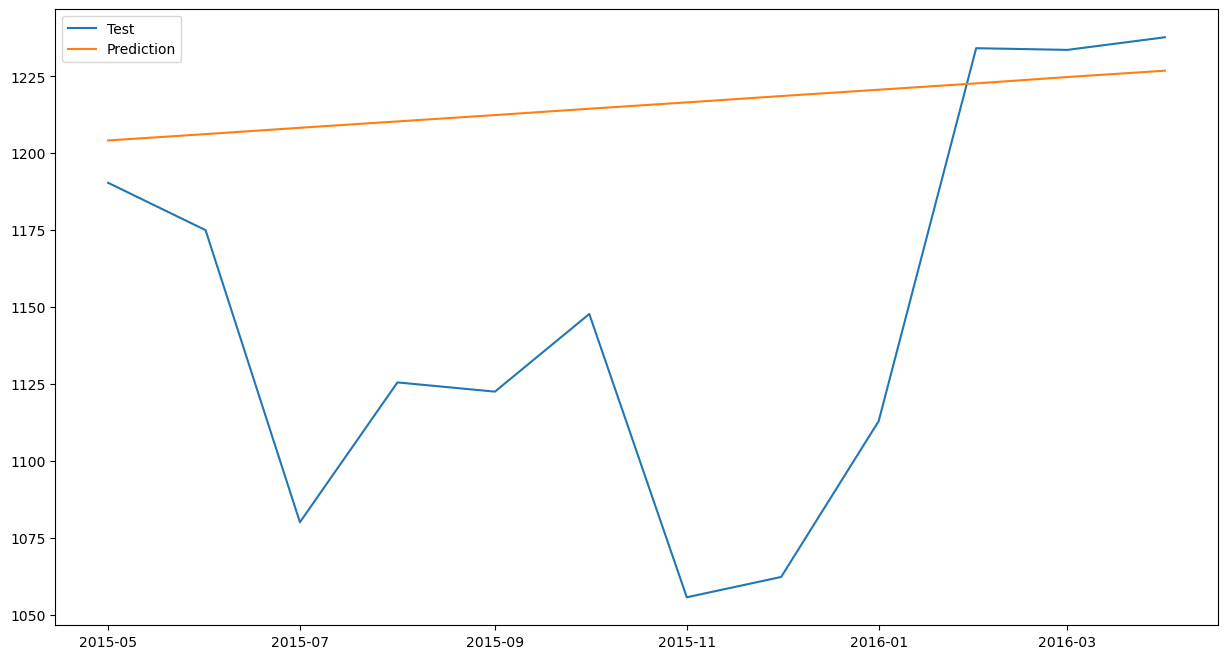

In [155]:
plt.figure(figsize = (15, 8))
plt.plot(y_test, label = "Test")
plt.plot(y_pred, label = "Prediction")
plt.legend()
plt.show()